In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Ai\credit.csv")

df = df.fillna(df.mean())
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
1,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
2,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
3,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
4,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

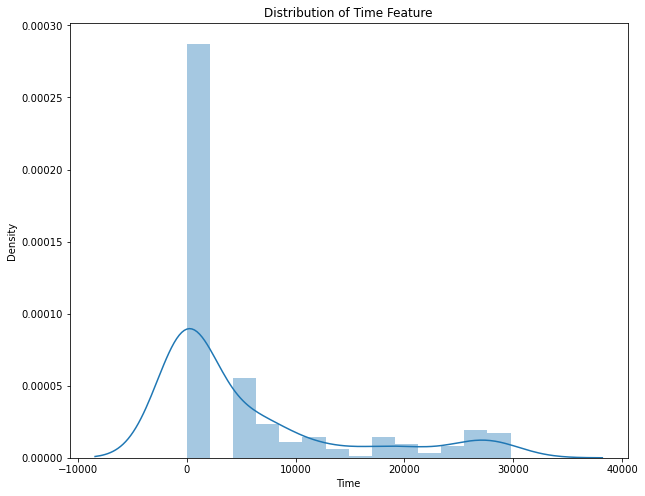

In [3]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

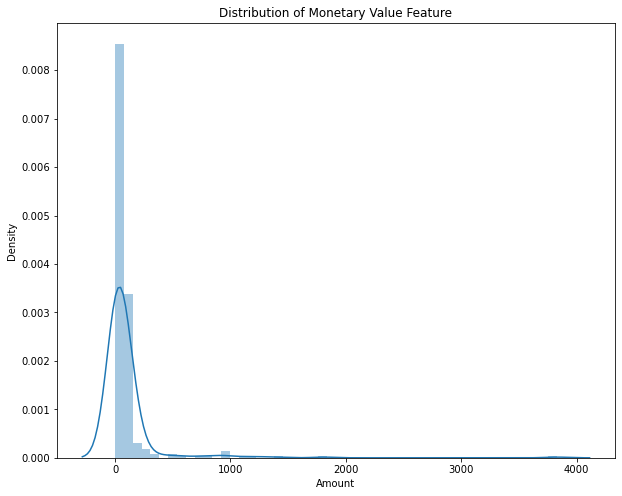

In [4]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [5]:
#KMEANS CLUSTERING

In [6]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.785977,0.835363,-0.865096,0.752906,-0.763507,-0.693594,-0.817970,0.708935,-0.719438,...,0.282773,-0.351629,-0.162923,-0.179206,0.315082,0.093493,0.557617,0.084237,-0.001217,0.868778
V1,-0.785977,1.000000,-0.877989,0.921739,-0.604880,0.934158,0.614432,0.902221,-0.862566,0.633210,...,-0.251217,0.421382,0.210997,0.091596,-0.370078,0.008203,-0.586335,0.031134,-0.077974,-0.581915
V2,0.835363,-0.877989,1.000000,-0.932998,0.705634,-0.861719,-0.753181,-0.894690,0.843554,-0.733095,...,0.337598,-0.407283,-0.117269,-0.192882,0.397772,0.092159,0.631748,0.117548,-0.209005,0.719066
V3,-0.865096,0.921739,-0.932998,1.000000,-0.796896,0.895555,0.708256,0.954521,-0.817468,0.812503,...,-0.257194,0.374251,0.162652,0.224952,-0.338912,-0.094818,-0.708844,-0.023818,-0.025542,-0.753335
V4,0.752906,-0.604880,0.705634,-0.796896,1.000000,-0.577243,-0.597585,-0.769836,0.435069,-0.850984,...,0.068044,-0.033197,-0.124539,-0.371340,0.098623,0.273232,0.686797,-0.028596,0.056538,0.820445
V5,-0.763507,0.934158,-0.861719,0.895555,-0.577243,1.000000,0.613527,0.874519,-0.895255,0.600008,...,-0.352890,0.404080,0.139266,0.074658,-0.361426,0.015273,-0.580584,-0.041849,-0.106509,-0.558679
V6,-0.693594,0.614432,-0.753181,0.708256,-0.597585,0.613527,1.000000,0.715035,-0.608772,0.613191,...,-0.285679,0.328589,0.170348,0.179647,-0.280139,-0.119128,-0.471370,-0.228785,0.285373,-0.685788
V7,-0.817970,0.902221,-0.894690,0.954521,-0.769836,0.874519,0.715035,1.000000,-0.778968,0.789379,...,-0.208491,0.280979,0.237540,0.192840,-0.219145,-0.087547,-0.709240,0.013488,0.075500,-0.699138
V8,0.708935,-0.862566,0.843554,-0.817468,0.435069,-0.895255,-0.608772,-0.778968,1.000000,-0.502506,...,0.515789,-0.550361,-0.162873,0.007290,0.486498,-0.101987,0.505098,0.334170,-0.016428,0.494222
V9,-0.719438,0.633210,-0.733095,0.812503,-0.850984,0.600008,0.613191,0.789379,-0.502506,1.000000,...,-0.091834,0.114907,0.121874,0.383650,-0.187224,-0.246983,-0.729209,0.002350,0.009331,-0.706741


Text(0.5, 1.0, 'Heatmap of Correlation')

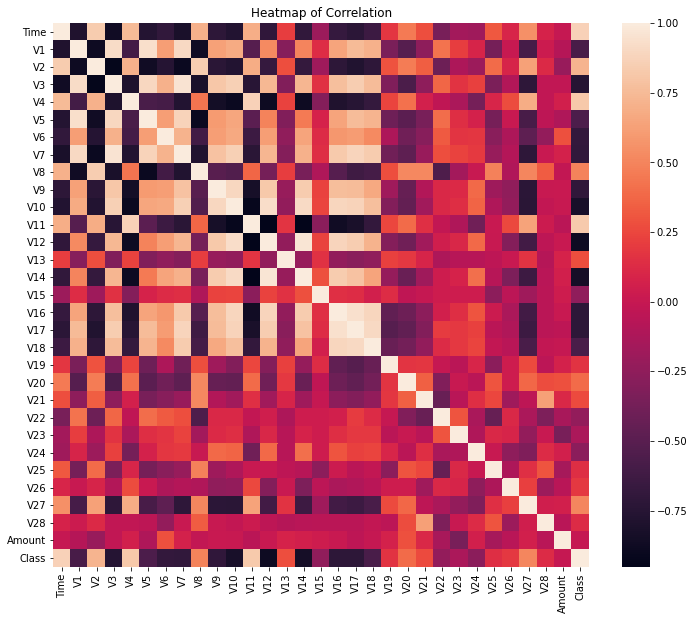

In [7]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [8]:
#KMEANS

In [9]:
X = df.iloc[:,:-1]
y = df['Class']


X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=500)

In [12]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=3)

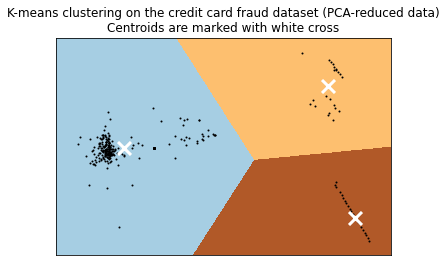

In [13]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
predictions = kmeans.predict(X_test)
sil_score = silhouette_score(X_test, predictions)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.7575757575757576
False negative rate (with respect to misclassifications):  1.0
False negative rate (with respect to all the data):  0.24242424242424243
False negatives, false positives, mispredictions: 24 0 24
Total test data points: 99


In [16]:
#LINEAR REGRESSION

In [17]:
# Use only the earlier credit columns as input features
X = df.drop(['Class'], axis=1)

# Use the 'Class' column as the target variable
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model object
lr_model = LinearRegression()

# Train the linear regression model on the training set
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test_scaled)

# Compute the mean squared error and R-squared score of the model
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)



R-squared Score: 0.7621386534938123


In [18]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 181 non-fraudulent transactions (68.561%) and 83 fraudulent transactions (31.439%).


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Create a Random Forest Regressor object with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor on the training set
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_scaled)

# Compute the R-squared score of the model
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)



R-squared Score: 0.9998283264853308


In [24]:
from sklearn.svm import SVR

# Create an SVM Regressor object with a linear kernel
svm_model = SVR(kernel='linear')

# Train the SVM Regressor on the training set
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Compute the R-squared score of the model
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)


R-squared Score: 0.8780114379530832
